### In this notebook, I will be exploring how model complexity relates to generalization performance

The data for this project will be drawn from a distribution:

The independent variable $x$ consists of $n$ evenly spaced points from the interval $[0, 20]$ and the dependent variable $y = 0.05x^3 - x^2 - x + C \epsilon$ is a function of $x$ where $\epsilon \sim \mathcal{N}(0, 1)$ represents the standard Gaussian noise and $C$ is a constant indicating the noise magnitude.

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)
C = 15
n = 60
x = np.linspace(0, 20, n)  # x is drawn from a fixed range
y = x ** 3 / 20 - x ** 2 - x + C * np.random.randn(n)

x = x.reshape(-1, 1) # convert x and y from simple array to a 1-column matrix for input to sklearn regression 
y = y.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

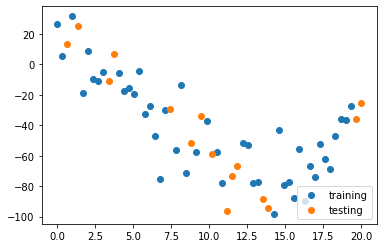

In [4]:
# Visualize the data
plt.figure()
plt.scatter(X_train, y_train, label='training')
plt.scatter(X_test, y_test, label='testing')
plt.legend(loc=4)

The visualization above shows that a linear function will not capture this data appropriately, so I will fit a polynomial regression model instead, with varying degrees.

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degs = (1, 3, 5, 7, 9, 11)  

results = []
for degree in degs:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train)
    pred_data = poly.transform(np.linspace(0, 20, 100).reshape(-1, 1))
    linreg= LinearRegression().fit(X_poly, y_train)
    pred = linreg.predict(pred_data)
    results.append(pred)
preds= np.asarray(results).reshape((6,100))  

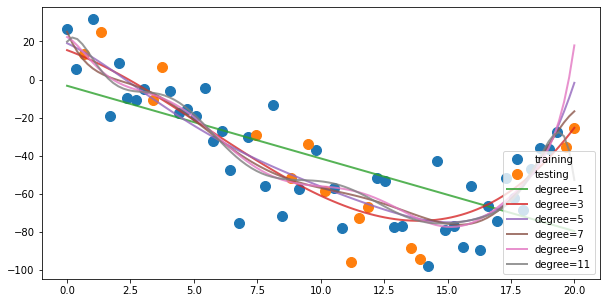

In [8]:
def plot_one(predictions):
    plt.figure(figsize=(10, 5))
    plt.plot(X_train, y_train, 'o', label='training', markersize=10)
    plt.plot(X_test, y_test, 'o', label='testing', markersize=10)
    for i, deg in enumerate(degs):
        plt.plot(np.linspace(0, 20, 100), predictions[i], alpha=0.8, lw=2, label=f"degree={deg}")
    plt.legend(loc=4)

plot_one(preds)

In [25]:
# Evaluate the R^2 value of each model
r2_train = []
r2_test = []
for deg in degs:
    poly = PolynomialFeatures(degree=deg)
    X_F1_poly = poly.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y, random_state = 0)
    linreg = LinearRegression().fit(X_train, y_train)
    r2_train.append([deg,linreg.score(X_train, y_train)])
    r2_test.append([deg,linreg.score(X_test, y_test)])


In [26]:
r2_train

[[1, 0.5146908335931619],
 [3, 0.7716782246401617],
 [5, 0.784621686909079],
 [7, 0.7905134245393333],
 [9, 0.7930063118832749],
 [11, 0.7966125425751247]]

In [27]:
r2_test

[[1, 0.3660750337906714],
 [3, 0.8666116934853962],
 [5, 0.8039479808945302],
 [7, 0.8114944985862202],
 [9, 0.6936666260763176],
 [11, 0.7889997868367259]]

#### High-degree polynomial features can result in overly complex models that lead to overfitting. Ridge and Lasso regularization methods constrain model complexity.

In [33]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import r2_score
scaler = MinMaxScaler()

scores = []
results = []
for deg in degs:
    poly = PolynomialFeatures(degree=deg)
    X_poly = poly.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state = 0)
    lareg = Lasso(alpha =0.01, max_iter = 10000).fit(X_train, y_train)
    pred_data = poly.transform(np.linspace(0, 20, 100).reshape(-1, 1))
    scores.append(lareg.score(X_test, y_test))

    pred = lareg.predict(pred_data)
    results.append(pred)

res = dict(zip(degs, scores))
preds= np.asarray(results).reshape((6,100)) 

# Predictions for the regularized model

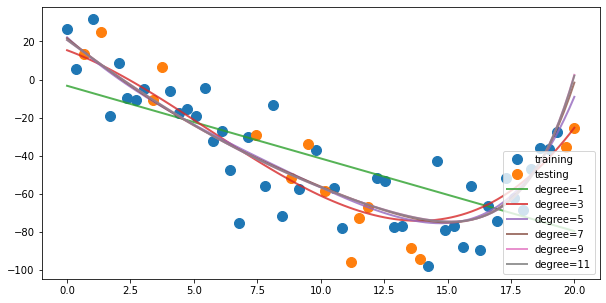

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
plot_one(preds)

In [35]:
sorted(res.items(), key=lambda x: (-x[1], x[0]))

[(3, 0.86664555881557),
 (5, 0.8339890414122438),
 (7, 0.8039816461665705),
 (11, 0.7894895902992525),
 (9, 0.7873690197023481),
 (1, 0.36607243446617477)]

Polynomial degree 3 leads to the highest R^2 score